## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

w1 = 2 * np.random.random((1, 2)) - 1
b1 = [0.,0.]
w2 = 2 * np.random.random((2, 2)) - 1
b2 = [0.,0.]
# можем посмотреть 

print(w1)
print(w2)

[[-0.39533485 -0.70648822]]
[[-0.81532281 -0.62747958]
 [-0.30887855 -0.20646505]]


In [2]:
# вычисление сигмоид функции

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

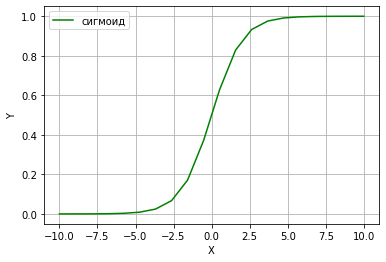

In [3]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,20)
Y = sigmoid(X)

plt.plot(X ,  Y ,'-g',label = 'сигмоид' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [42]:
''' 
Исходный код к уроку 1.
Демонстрация работы градиентного спуска 
'''

# первоначальное точка
start_point = -1.5

# размер шага(learning rate)
learn_r = 0.05
# установка первоначальной точности
precision = 0.0001

# функция градиента для y = X**4 - 3 * X**3 
gr_func = lambda x: 4 * x**3 - 9 * x**2

# для картинки
D  = 1

X = np.linspace(2.2-D,2.2+D,20)
Y = X**4 - 3 * X**3 

# начальная точка
next_point = start_point

iter = 0 

x = []
x.append(next_point)

Итерация: 1
Текущая точка -1.5| След-я точка 0.1875
Дистан-я между текущей точк. и след. 1.6875
--------------------------------------------------------
Итерация: 2
Текущая точка 0.1875| След-я точка 0.202001953125
Дистан-я между текущей точк. и след. 0.014501953124999994
--------------------------------------------------------
Итерация: 3
Текущая точка 0.202001953125| След-я точка 0.21871557878719178
Дистан-я между текущей точк. и след. 0.016713625662191783
--------------------------------------------------------
Итерация: 4
Текущая точка 0.21871557878719178| След-я точка 0.23814948801950425
Дистан-я между текущей точк. и след. 0.019433909232312474
--------------------------------------------------------
Итерация: 5
Текущая точка 0.23814948801950425| След-я точка 0.26096998025788426
Дистан-я между текущей точк. и след. 0.022820492238380008
--------------------------------------------------------
Итерация: 6
Текущая точка 0.26096998025788426| След-я точка 0.28806268966978593
Дистан-я м

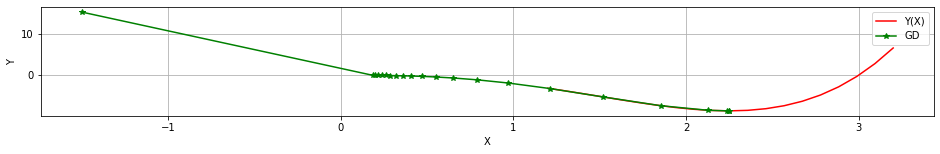

In [43]:

plt.figure(figsize=(16,2))
plt.plot(X,  Y ,'r',label = 'Y(X)' )

# количество итерация 
n = 30
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learn_r*gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    iter += 1

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {iter}")
    print(f"Текущая точка {current_point}| След-я точка {next_point}")
    print(f"Дистан-я между текущей точк. и след. {abs(current_point - next_point)}")
    print("--------------------------------------------------------")
    
    
    if(abs(current_point - next_point) <= precision):
        break

print(f"минимум {next_point}, количество затраченных итераций: {iter}") 
X_grad = np.array(x)
plt.plot(X_grad ,  (X_grad **4 - 3 * X_grad **3) ,'-*g',label = 'GD' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

Метод обратного распрасранения (backpropogation) самый популярный способ обучения нейронных сетей, однако у него есть несколько альтернатив - Метод упругого распространения (Resilient propagation или Rprop)  и генетический алгоритм (Genetic Algorithm). Rprop для корректировки весов и смещений использует знак градиента, а не его значение, а генетический алгоритм для задач оптимизации и моделирования использует случайный подбор.


## Небольшой пример по обучению простой нейронной сети


Рассмотрим создание простой нейронной сети. Данная нейронная сеть будет обучаться предсказывать 4 число на основании первых трех. Для этого мы ей передадим обучающую набор данных из трех последовательностей чисел. В каждой последовательности чисел будет три первых числа в качетсве входных данных и 4 число которое следуюет за этими данными.
После обучения нейронной сети мы просим пользователя ввести 3 числа и программа выдаст 4 число в качестве предсказания.

В данном примере будут использоваться следующие обучающие последовательсноти:

Данные 1|    0	    0	1	 0

Данные 2|    1	    1	1	 1

Данные 3|    1	    0	1	 1

Данные 4|    0	    1	1	 0


Здесь можно заметить, что четвертое число всегда соотвествует первому. Эту закономерность и должна благодаря коду ниже научиться обнаруживать нейронная сеть, а затем на произвольных данных введенных пользователем выдать правильное предсказание.
Этот пример позволяет создать и запустить простейшую нейронную сеть, но уже  в этом примере присутсвуют все необходимые атрибуты создания нейронных сетей: подготовка данных для обучения модели, конфигурация модели, запуск модели.
Дальше мы разберем, что такое функция активации, обратное распространение, внутренние слои нейронной сети и прочие аспекты создания нейронных сетей.
Обратите внимание, что здесь используется библиотека numpy для получения дополнительных команд при работе с массивами. Более подробно данную библиотеку мы рассмотрим позже.

In [8]:
'''
Исходный код к уроку 1.
Пример простой нейронной сети на numpy
'''

import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1


# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)
    
# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)
# вычисление производной от Relu функции
def relu_deriv(x):
    return x>0

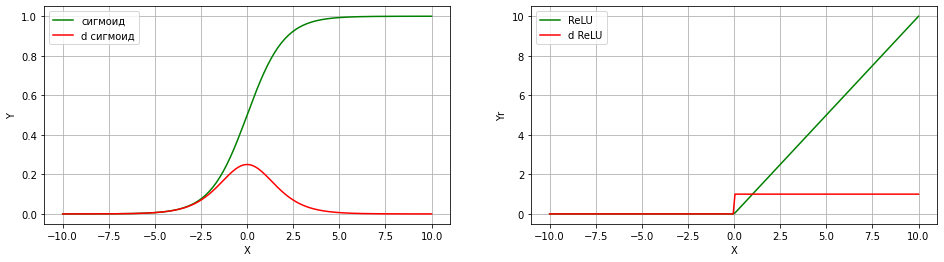

In [9]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,210)
Y = sigmoid(X)
dY = sigm_deriv(sigmoid(X))

plt.figure(figsize =(16,4))
plt.subplot(1,2,1)
plt.plot(X ,  Y ,'-g',label = 'сигмоид' )
plt.plot(X ,  dY ,'-r',label = 'd сигмоид' )
plt.grid('On')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

Yr = ReLU(X)
dYr = relu_deriv(ReLU(X))
plt.subplot(1,2,2)
plt.plot(X ,  Yr ,'-g',label = 'ReLU' )
plt.plot(X ,  dYr ,'-r',label = 'd ReLU' )
plt.legend()
plt.grid('On')
plt.xlabel('X')
plt.ylabel('Yr')
plt.show()

In [44]:
# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение back-propagation
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))*0.1

        synaptic_weights += adjustments


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

In [49]:
# создание данных для обучения
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

# запуск тренировки нейронной сети 
train_nn(training_inputs, training_outputs, 200000)
print("веса после завершения обучения: ")
print(synaptic_weights)

# получение трех чисел от пользователя
user_inp1 = str(input("Первое число(0 или 1): "))
user_inp2 = str(input("Второе число(0 или 1): "))
user_inp3 = str(input("Третье число(0 или 1): "))

print("Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([user_inp1, user_inp2, user_inp3])))


веса после завершения обучения: 
[[12.19398136]
 [-0.20426415]
 [-5.89304014]]


Первое число(0 или 1):  1
Второе число(0 или 1):  0
Третье число(0 или 1):  1


Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}
Предсказание нейронной сети: 
[0.99816878]


In [48]:
print(run_nn(np.array([1,0,0])))

[0.99999392]


## Пример построения  двухслойной нейронной сети на numpy

In [50]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [52]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


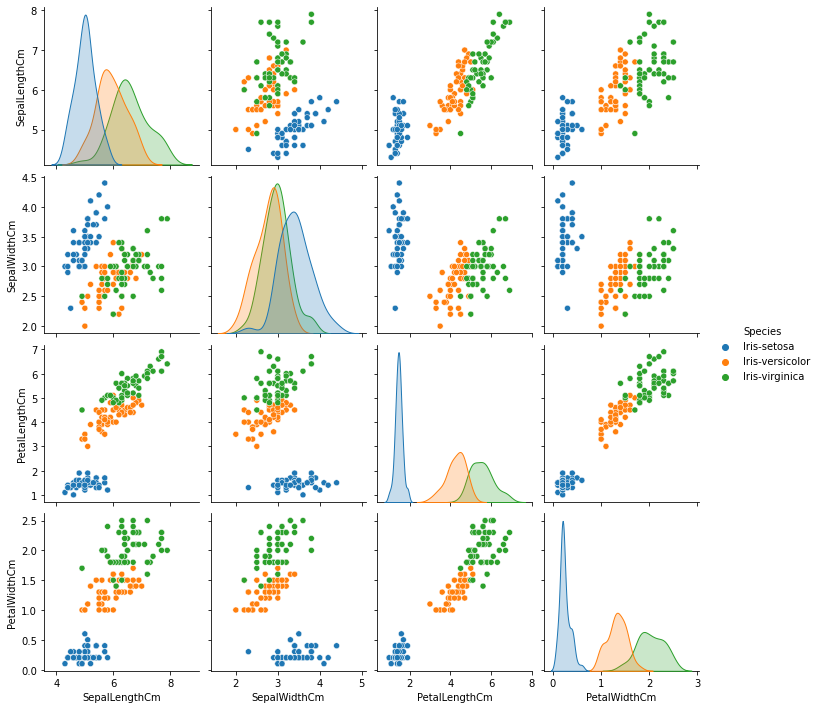

In [53]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [54]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

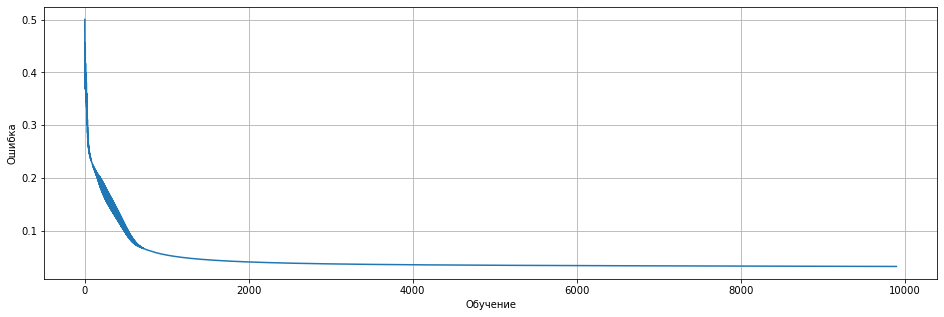

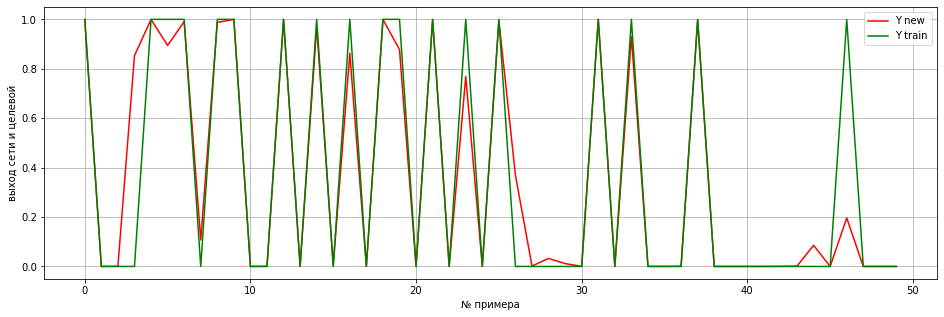

Аккуратность нейронной сети 96.78%


In [79]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 20


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(9900):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



In [80]:
w1

array([[  2.54049099,  -3.72605425,  -4.65333867],
       [  3.66339059,  -4.93002888,  -9.58088655],
       [ -2.48766912,   5.71516673,  -7.37341669],
       [  1.04593639,  -8.16793179,   7.43482668],
       [ -0.32934313,   0.92827251,  -0.50012492],
       [ -2.54062593,   3.98377281,  -4.00724392],
       [ -0.67477017,  -1.30591368,   1.68688356],
       [  0.66497852,  -0.03898839,  -1.32677584],
       [ -3.00843938,   3.098357  ,   2.09034205],
       [ -0.07005455,  -2.38870101,   0.43492038],
       [  0.04603259,   0.17531231,  -0.53834384],
       [ -2.73026454,   1.56441951,  -1.37893262],
       [  0.86956908,  -4.66981471,   2.7190595 ],
       [ -2.95312777,   3.37762803,   1.44897632],
       [ -2.74246937,   9.35382736, -14.1898483 ],
       [  3.74490028,  -4.47912214, -10.09238779],
       [ -0.9403331 ,   0.97881417,  -0.62683873],
       [ -0.34366423,  -3.66601708,  -0.32109289],
       [ -0.49940985,  -4.42573761,   2.91689364],
       [ -0.45445593,  -0.85270

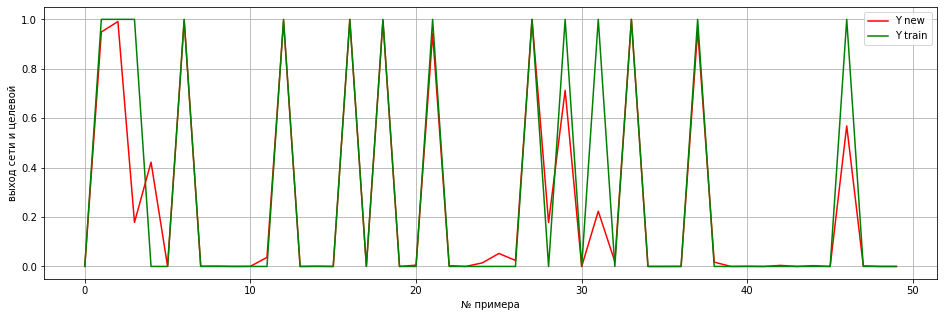

Аккуратность нейронной сети на тесте 95.32%


In [81]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Вывод: попробовала разное количество нейронов, эпох и скорость обучения, после этого порого с дальнейшим увеличением, точность снижается